In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
file_path = 'C:/Users/yakan/OneDrive/Documents/Thinkful/DS_Bootcamp/Unit1_data_and_analysis_ds_for_investigations/Lesson3_Intermediate_visualization/challenge_data_sets/kaggle_store_forecasting_train_data.csv'
data_set = pd.read_csv(file_path)

In [3]:
data_set.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [19]:
edu_data = pd.read_csv('C:/Users/yakan/OneDrive/Documents/Thinkful/DS_Bootcamp/Unit1_data_and_analysis_ds_for_investigations/Lesson3_Intermediate_visualization/challenge_data_sets/states_all.csv')

In [20]:
edu_data.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN


In [4]:
#plot one variable 4 different ways

In [11]:
#1. plot total sales over time
total_sales = data_set[['date', 'sales']].groupby('date').sum()

In [12]:
total_sales.head()

,sales
date,
2013-01-01,13696
2013-01-02,13678
2013-01-03,14488
2013-01-04,15677
2013-01-05,16237


In [14]:
#this one produces error.....
sns.relplot(x = 'date',
            y = 'sales',
            kind = 'line',
            data = total_sales)

ValueError: Could not interpret input 'date'

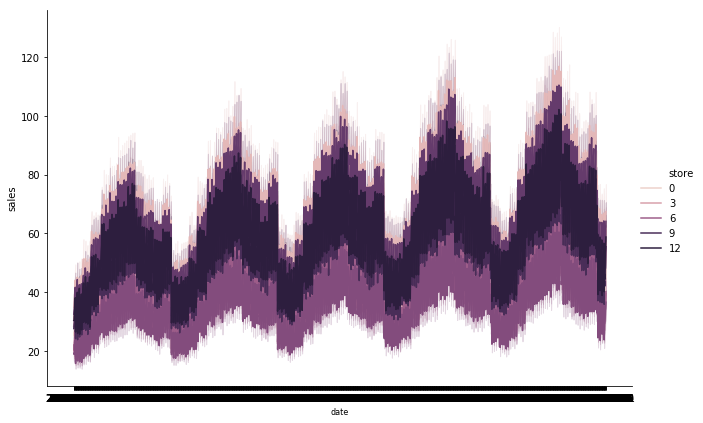

In [18]:
#2. plot sales by store over time
plot = sns.relplot(x = 'date',
            y = 'sales',
            kind = 'line',
            hue = 'store',
            height = 6, 
            aspect = 3 / 2,
            data = data_set)
plot.set_xlabels(fontsize = 8)

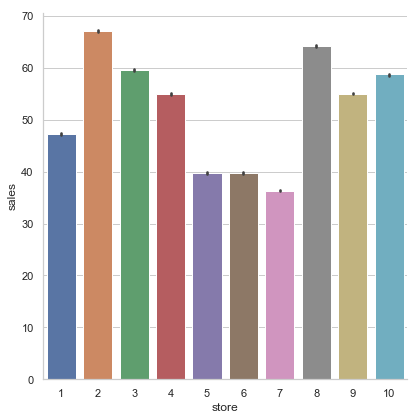

In [28]:
# 3. plot sales by store - bar
sns.set(style = 'whitegrid')
sales_plot = sns.catplot(x = 'store',
                         y = 'sales',
                         data = data_set, 
                         height = 6, 
                         kind = 'bar',
                         ci = 95#,
                         #dodge = True,
                         #join = False)
                        )
plt.show()

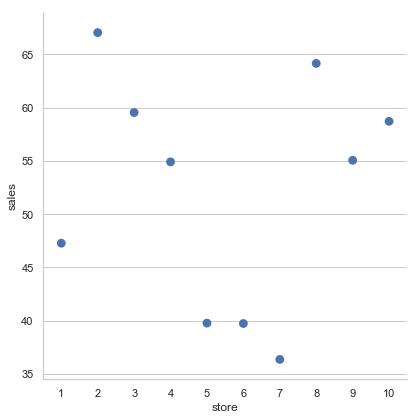

In [32]:
# 3. plot sales by store - point
sns.set(style = 'whitegrid')
sns.catplot(x = 'store',
            y = 'sales',
            data = data_set, 
            height = 6, 
            kind = 'point',
            ci = 75,
            dodge = True,
            join = False)

In [33]:
#plotting 2 continuous variables 3 different ways (use edu_data)

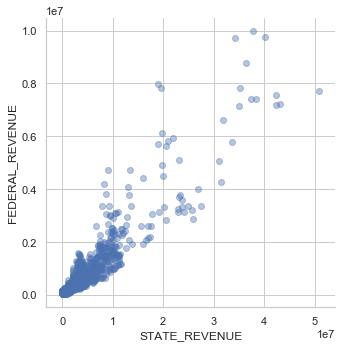

In [34]:
# 1. plot state revenue vs federal revenue to see if there is a correlation
sns.lmplot(y = 'FEDERAL_REVENUE',
           x = 'STATE_REVENUE',
           data = edu_data,
           fit_reg = False,
           scatter_kws = {'alpha':0.4})

In [46]:
# 2. plot distributions of total revenue and state revenue by state to compare their magnitudes
edu_data_full = edu_data.dropna()

AttributeError: module 'seaborn' has no attribute 'plt'

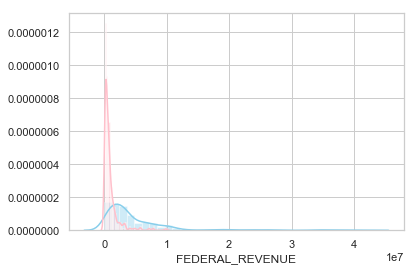

In [47]:
#example used 
#https://python-graph-gallery.com/25-histogram-with-several-variables-seaborn/
sns.distplot(edu_data_full['STATE_REVENUE'], color = 'skyblue', label = 'State Revenue')
sns.distplot(edu_data_full['FEDERAL_REVENUE'], color = 'pink', label = 'Federal Revenue')
#sns.plt.legend()

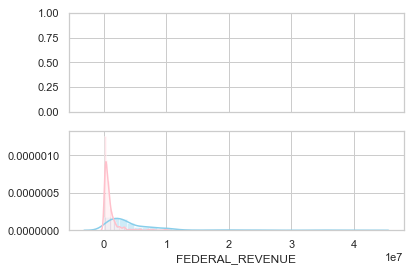

In [57]:
#compare the distributions on separate graphs
axes = plt.subplots(2, 1, sharex=True)
sns.distplot(edu_data_full['STATE_REVENUE'], color="skyblue")
sns.distplot(edu_data_full['FEDERAL_REVENUE'], color="pink")